In [1]:
import graphviz
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("HittersNoSchmidtNorKennedy.csv")[["Years", "CHits", "HmRun", "Salary"]]
df = df[df.Salary > 0]
X = df[["Years", "CHits", "HmRun"]].values
y = df.Salary.values
df

,Years,CHits,HmRun,Salary
1,14,835,7,475.0
2,3,457,18,480.0
3,11,1575,20,500.0
4,2,101,10,91.5
5,11,1133,4,750.0
...,...,...,...,...
315,5,806,7,700.0
316,12,1511,5,875.0
317,6,433,3,385.0
318,8,857,9,960.0


In [3]:
M = DecisionTreeRegressor(max_depth=1)
M.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

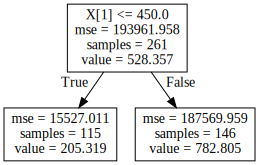

In [4]:
dot_data = tree.export_graphviz(M, out_file=None) 
G = graphviz.Source(dot_data)
G

In [6]:
n = 261
j = 1
s = 450.
val = y.mean()
mse = y.var()
print(val, mse)
IL = X[:, j] <= s
IR = X[:, j] > s
XL = X[IL, :]
XR = X[IR, :]
yL = y[IL]
yR = y[IR]

528.3569885057472 193961.95800187346


In [7]:
nL = len(XL)
nR = len(XR)
valL = yL.mean()
valR = yR.mean()
mseL = yL.var()
mseR = yR.var()

print(nL, nR)
print(valL, valR)
print(mseL, mseR)

115 146
205.31884347826087 782.8048424657534
15527.011372653764 187569.9592672834


In [8]:
min(X[:,j]), max(X[:,j])

(42, 4256)

In [9]:
ss = range(min(X[:,j]), max(X[:,j]))
nLs = []
nRs = []
mseLs = []
mseRs = []
for s in ss:
    IL = X[:, j] <= s
    IR = X[:, j] > s
    XL = X[IL, :]
    XR = X[IR, :]
    yL = y[IL]
    yR = y[IR]
    
    nL = len(XL)
    nR = len(XR)
    mseL = yL.var()
    mseR = yR.var()
    
    nLs.append(nL)
    nRs.append(nR)
    mseLs.append(mseL)
    mseRs.append(mseR)

np.array(nLs)
np.array(nRs)
mseLs = np.array(mseLs)
mseRs = np.array(mseRs)

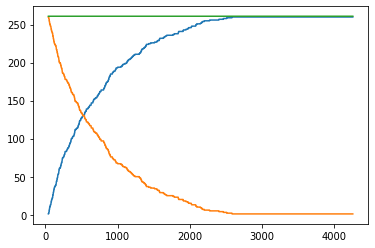

In [10]:
plt.plot(ss, nLs)
plt.plot(ss, nRs)
plt.plot(ss, np.array(nLs) + np.array(nRs))

In [11]:
differences = mseLs*nLs/n + mseRs*nRs/n

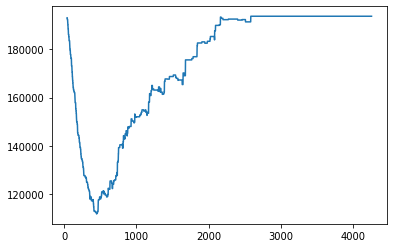

In [12]:
plt.plot(ss, differences)

In [36]:
ss[np.argmax(differences)]

448

In [37]:
np.max(differences)

82196.36274946517

4
56075.04967653373


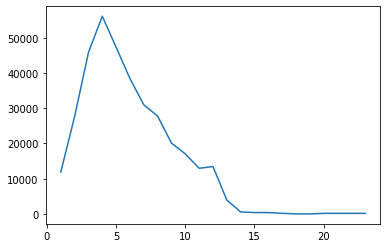

In [43]:
j = 0
ss = range(min(X[:,j]), max(X[:,j]))
nLs = []
nRs = []
mseLs = []
mseRs = []
for s in ss:
    IL = X[:, j] <= s
    IR = X[:, j] > s
    XL = X[IL, :]
    XR = X[IR, :]
    yL = y[IL]
    yR = y[IR]
    
    nL = len(XL)
    nR = len(XR)
    mseL = yL.var()
    mseR = yR.var()
    
    nLs.append(nL)
    nRs.append(nR)
    mseLs.append(mseL)
    mseRs.append(mseR)

np.array(nLs)
np.array(nRs)
mseLs = np.array(mseLs)
mseRs = np.array(mseRs)

differences = mse - mseLs*nLs/n - mseRs*nRs/n
plt.plot(ss, differences)
print(ss[np.argmax(differences)])
print(max(differences))

8
26392.938619604247


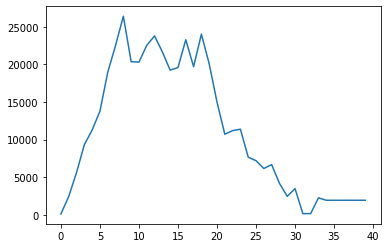

In [44]:
j = 2
ss = range(min(X[:,j]), max(X[:,j]))
nLs = []
nRs = []
mseLs = []
mseRs = []
for s in ss:
    IL = X[:, j] <= s
    IR = X[:, j] > s
    XL = X[IL, :]
    XR = X[IR, :]
    yL = y[IL]
    yR = y[IR]
    
    nL = len(XL)
    nR = len(XR)
    mseL = yL.var()
    mseR = yR.var()
    
    nLs.append(nL)
    nRs.append(nR)
    mseLs.append(mseL)
    mseRs.append(mseR)

np.array(nLs)
np.array(nRs)
mseLs = np.array(mseLs)
mseRs = np.array(mseRs)

differences = mse - mseLs*nLs/n - mseRs*nRs/n
plt.plot(ss, differences)
print(ss[np.argmax(differences)])
print(max(differences))